<a href="https://colab.research.google.com/github/wangqiao991/wangqiao991_64061/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The IMDB dataset

**Loading the IMDB dataset**

In [5]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [6]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [7]:
train_labels[0]

1

In [8]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [10]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [14]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/20
30/30 [==============================] - 3s 71ms/step - loss: 0.5588 - accuracy: 0.7361 - val_loss: 0.4431 - val_accuracy: 0.8486
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3450 - accuracy: 0.8893 - val_loss: 0.3252 - val_accuracy: 0.8823
Epoch 3/20
30/30 [==============================] - 2s 57ms/step - loss: 0.2520 - accuracy: 0.9170 - val_loss: 0.3217 - val_accuracy: 0.8678
Epoch 4/20
30/30 [==============================] - 1s 50ms/step - loss: 0.2017 - accuracy: 0.9341 - val_loss: 0.3238 - val_accuracy: 0.8697
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1645 - accuracy: 0.9484 - val_loss: 0.2777 - val_accuracy: 0.8864
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1424 - accuracy: 0.9561 - val_loss: 0.3215 - val_accuracy: 0.8732
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1202 - accuracy: 0.9641 - val_loss: 0.3014 - val_accuracy: 0.8832
Epoch 8/20
30

In [17]:
results

[0.62640780210495, 0.8591600060462952]

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

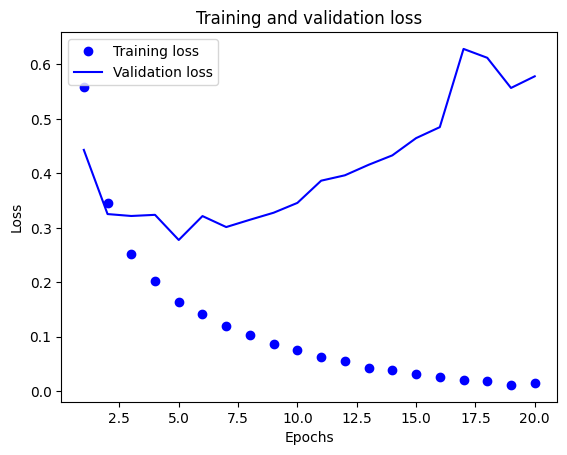

In [19]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

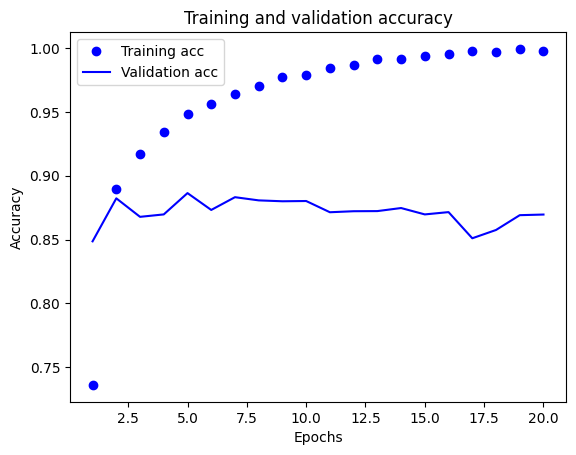

In [20]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [21]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 26ms/step - loss: 0.4529 - accuracy: 0.8201
Epoch 2/4
49/49 [==============================] - 2s 34ms/step - loss: 0.2746 - accuracy: 0.9042
Epoch 3/4
49/49 [==============================] - 2s 34ms/step - loss: 0.2171 - accuracy: 0.9210
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2830 - accuracy: 0.8872


In [22]:
results

[0.28302910923957825, 0.8871999979019165]

### Using a trained model to generate predictions on new data

In [ ]:
model.predict(x_test)

**Version of the model with 3 Hidden Layer**

In [4]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[0]
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [7]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
model.fit(x_train, y_train, epochs=20, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/20
49/49 [==============================] - 4s 43ms/step - loss: 0.4922 - accuracy: 0.8027
Epoch 2/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2806 - accuracy: 0.9004
Epoch 3/20
49/49 [==============================] - 2s 34ms/step - loss: 0.2138 - accuracy: 0.9224
Epoch 4/20
49/49 [==============================] - 2s 37ms/step - loss: 0.1816 - accuracy: 0.9333
Epoch 5/20
49/49 [==============================] - 1s 28ms/step - loss: 0.1587 - accuracy: 0.9432
Epoch 6/20
49/49 [==============================] - 1s 26ms/step - loss: 0.1399 - accuracy: 0.9510
Epoch 7/20
49/49 [==============================] - 1s 25ms/step - loss: 0.1284 - accuracy: 0.9541
Epoch 8/20
49/49 [==============================] - 1s 25ms/step - loss: 0.1132 - accuracy: 0.9602
Epoch 9/20
49/49 [==============================] - 1s 26ms/step - loss: 0.0999 - accuracy: 0.9669
Epoch 10/20
49/49 [==============================] - 1s 25ms/step - loss: 0.0895 - accuracy: 0.9713
Epoch 11/

In [8]:
results

[0.7122204899787903, 0.8554800152778625]

**Version of the model with 64 Hidden Units**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[0]
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
model.fit(x_train, y_train, epochs=20, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/20
49/49 [==============================] - 3s 50ms/step - loss: 0.4371 - accuracy: 0.8050
Epoch 2/20
49/49 [==============================] - 2s 47ms/step - loss: 0.2606 - accuracy: 0.8982
Epoch 3/20
49/49 [==============================] - 2s 46ms/step - loss: 0.2131 - accuracy: 0.9171
Epoch 4/20
49/49 [==============================] - 4s 78ms/step - loss: 0.1701 - accuracy: 0.9371
Epoch 5/20
49/49 [==============================] - 5s 94ms/step - loss: 0.1445 - accuracy: 0.9457
Epoch 6/20
49/49 [==============================] - 4s 91ms/step - loss: 0.1189 - accuracy: 0.9561
Epoch 7/20
49/49 [==============================] - 3s 67ms/step - loss: 0.0986 - accuracy: 0.9645
Epoch 8/20
49/49 [==============================] - 3s 68ms/step - loss: 0.0771 - accuracy: 0.9742
Epoch 9/20
49/49 [==============================] - 3s 51ms/step - loss: 0.0610 - accuracy: 0.9792
Epoch 10/20
49/49 [==============================] - 3s 59ms/step - loss: 0.0430 - accuracy: 0.9880
Epoch 11/

In [3]:
results

[0.7195673584938049, 0.869159996509552]

**Version of the model with MSE Loss Function**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[0]
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="MSE",
              metrics=["accuracy"])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
model.fit(x_train, y_train, epochs=20, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/20
49/49 [==============================] - 2s 27ms/step - loss: 0.1603 - accuracy: 0.8014
Epoch 2/20
49/49 [==============================] - 1s 28ms/step - loss: 0.0906 - accuracy: 0.8952
Epoch 3/20
49/49 [==============================] - 1s 26ms/step - loss: 0.0699 - accuracy: 0.9169
Epoch 4/20
49/49 [==============================] - 2s 35ms/step - loss: 0.0588 - accuracy: 0.9304
Epoch 5/20
49/49 [==============================] - 2s 37ms/step - loss: 0.0519 - accuracy: 0.9394
Epoch 6/20
49/49 [==============================] - 1s 27ms/step - loss: 0.0469 - accuracy: 0.9454
Epoch 7/20
49/49 [==============================] - 1s 26ms/step - loss: 0.0423 - accuracy: 0.9521
Epoch 8/20
49/49 [==============================] - 1s 26ms/step - loss: 0.0381 - accuracy: 0.9582
Epoch 9/20
49/49 [==============================] - 1s 27ms/step - loss: 0.0353 - accuracy: 0.9613
Epoch 10/20
49/49 [==============================] - 1s 27ms/step - loss: 0.0311 - accuracy: 0.9688
Epoch 11/

In [3]:
results

[0.10713143646717072, 0.8656799793243408]

**Version of the model with Tanh Activation**

In [4]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[0]
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [5]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
model.fit(x_train, y_train, epochs=20, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/20
49/49 [==============================] - 3s 45ms/step - loss: 0.4486 - accuracy: 0.8221
Epoch 2/20
49/49 [==============================] - 3s 53ms/step - loss: 0.2567 - accuracy: 0.9059
Epoch 3/20
49/49 [==============================] - 2s 51ms/step - loss: 0.1962 - accuracy: 0.9269
Epoch 4/20
49/49 [==============================] - 2s 32ms/step - loss: 0.1640 - accuracy: 0.9413
Epoch 5/20
49/49 [==============================] - 1s 26ms/step - loss: 0.1446 - accuracy: 0.9476
Epoch 6/20
49/49 [==============================] - 1s 28ms/step - loss: 0.1282 - accuracy: 0.9561
Epoch 7/20
49/49 [==============================] - 1s 27ms/step - loss: 0.1154 - accuracy: 0.9622
Epoch 8/20
49/49 [==============================] - 1s 27ms/step - loss: 0.1040 - accuracy: 0.9658
Epoch 9/20
49/49 [==============================] - 2s 34ms/step - loss: 0.0987 - accuracy: 0.9670
Epoch 10/20
49/49 [==============================] - 2s 37ms/step - loss: 0.0873 - accuracy: 0.9726
Epoch 11/

In [6]:
results

[0.6819387674331665, 0.8497599959373474]

**Version of the model with Regularization**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[0]
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [8]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
model.fit(x_train, y_train, epochs=20, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/20
49/49 [==============================] - 2s 33ms/step - loss: 0.6015 - accuracy: 0.7665
Epoch 2/20
49/49 [==============================] - 1s 27ms/step - loss: 0.3937 - accuracy: 0.8924
Epoch 3/20
49/49 [==============================] - 2s 38ms/step - loss: 0.3306 - accuracy: 0.9084
Epoch 4/20
49/49 [==============================] - 2s 35ms/step - loss: 0.2995 - accuracy: 0.9186
Epoch 5/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2839 - accuracy: 0.9214
Epoch 6/20
49/49 [==============================] - 1s 27ms/step - loss: 0.2741 - accuracy: 0.9257
Epoch 7/20
49/49 [==============================] - 1s 26ms/step - loss: 0.2674 - accuracy: 0.9285
Epoch 8/20
49/49 [==============================] - 1s 26ms/step - loss: 0.2596 - accuracy: 0.9337
Epoch 9/20
49/49 [==============================] - 1s 26ms/step - loss: 0.2537 - accuracy: 0.9345
Epoch 10/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2530 - accuracy: 0.9339
Epoch 11/

In [9]:
results

[0.3911743462085724, 0.8755999803543091]

**Version of the model with Dropout**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[0]
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [10]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
model.fit(x_train, y_train, epochs=20, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/20
49/49 [==============================] - 3s 29ms/step - loss: 0.6125 - accuracy: 0.6566
Epoch 2/20
49/49 [==============================] - 2s 36ms/step - loss: 0.4651 - accuracy: 0.7944
Epoch 3/20
49/49 [==============================] - 2s 37ms/step - loss: 0.3713 - accuracy: 0.8574
Epoch 4/20
49/49 [==============================] - 1s 28ms/step - loss: 0.3151 - accuracy: 0.8883
Epoch 5/20
49/49 [==============================] - 1s 26ms/step - loss: 0.2713 - accuracy: 0.9054
Epoch 6/20
49/49 [==============================] - 1s 27ms/step - loss: 0.2364 - accuracy: 0.9181
Epoch 7/20
49/49 [==============================] - 1s 27ms/step - loss: 0.2143 - accuracy: 0.9271
Epoch 8/20
49/49 [==============================] - 1s 27ms/step - loss: 0.1937 - accuracy: 0.9352
Epoch 9/20
49/49 [==============================] - 1s 27ms/step - loss: 0.1768 - accuracy: 0.9391
Epoch 10/20
49/49 [==============================] - 1s 27ms/step - loss: 0.1586 - accuracy: 0.9443
Epoch 11/

In [ ]:
results

[0.41984787583351135, 0.8647199869155884]

**Version of the model with Dropout**

---



In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[0]
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
model.fit(x_train, y_train, epochs=5, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/5
49/49 [==============================] - 4s 56ms/step - loss: 0.5101 - accuracy: 0.7564
Epoch 2/5
49/49 [==============================] - 2s 49ms/step - loss: 0.3086 - accuracy: 0.8821
Epoch 3/5
49/49 [==============================] - 2s 47ms/step - loss: 0.2432 - accuracy: 0.9084
Epoch 4/5
49/49 [==============================] - 4s 75ms/step - loss: 0.1969 - accuracy: 0.9276
Epoch 5/5
782/782 [==============================] - 5s 7ms/step - loss: 0.3007 - accuracy: 0.8847


In [5]:
results

[0.2861745059490204, 0.8871600031852722]